# Analisi dei dati raccolti

## Setup

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [14]:
def plotter(dataframes: list, index: str, names: list, space: int) -> None:
    xvalues_int = list()
    xvalues_str = list()
    for name in names:
        xvalues_str.extend(["", name, ""])

    plt.gcf().set_size_inches(10, 6)
    plt.title("Hashing")
    plt.ylabel("Tempo di esecuzione")
    
    start = 1
    ymax = 0
    for dataframe in dataframes:
        series = dataframe[index]
        ymax = max(ymax, max(series))
        x = [start, start+1, start+2]
        xvalues_int.extend(x)
        plt.bar(x, [series.min(), series.mean(), series.max()])
        start += 5
    
    plt.xticks(xvalues_int, xvalues_str, rotation=90)
    plt.yticks([i for i in range(0, ymax+space, space)])
    plt.grid(axis="y")
    
    plt.show()

In [15]:
PATH = "../asconxofv12/data/{}.csv"

IMPLEMENTATIONS = [
    "armv7m", "armv7m_lowsize", "armv7m_small", "bi32", "bi32_armv7m", "bi32_lowreg", "bi32_lowsize", "opt32", "opt32_lowsize", "ref"
]

armv7m = pd.read_csv(open(PATH.format("armv7m"), "r"), delimiter=";")
armv7m_lowsize = pd.read_csv(open(PATH.format("armv7m_lowsize"), "r"), delimiter=";")
armv7m_small = pd.read_csv(open(PATH.format("armv7m_small"), "r"), delimiter=";")
bi32 = pd.read_csv(open(PATH.format("bi32"), "r"), delimiter=";")
bi32_armv7m = pd.read_csv(open(PATH.format("bi32_armv7m"), "r"), delimiter=";")
bi32_lowreg = pd.read_csv(open(PATH.format("bi32_lowreg"), "r"), delimiter=";")
bi32_lowsize = pd.read_csv(open(PATH.format("bi32_lowsize"), "r"), delimiter=";")
opt32 = pd.read_csv(open(PATH.format("opt32"), "r"), delimiter=";")
opt32_lowsize = pd.read_csv(open(PATH.format("opt32_lowsize"), "r"), delimiter=";")
ref = pd.read_csv(open(PATH.format("ref"), "r"), delimiter=";")

DATAFRAMES = [
    armv7m, armv7m_lowsize, armv7m_small, bi32, bi32_armv7m, bi32_lowreg, bi32_lowsize, opt32, opt32_lowsize, ref
]

## Grafici

Ogni grafico presente in questo notebook è suddiviso in dieci parti, ognuna delle quali contiene una rappresentazione dei dati raccolti durante il testing in fase di generazione dell'hash di una data implementazione

Le implementazioni, che vanno a indicizzare l'asse delle X, vengono rappresentate da tre barre:
* la barra di sinistra rappresenta il valore **minimo**
* la barra centrale rappresenta il valore **medio**
* la barra di destra rappresenta il valore **massimo**

I valori sull'asse Y rappresentano il tempo di esecuzione in **microsecondi**

### PT vuoto

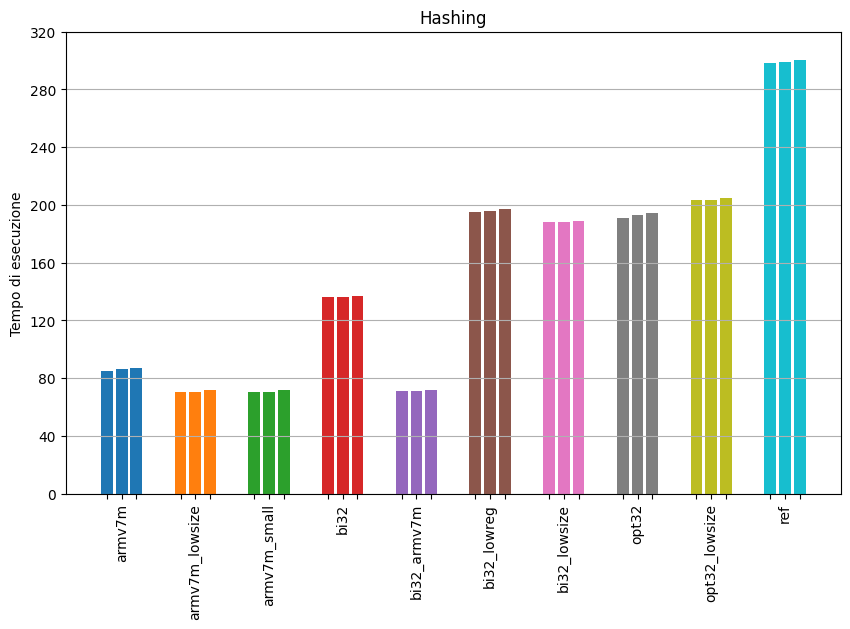

In [16]:
# Generazione hash
plotter(DATAFRAMES, "0B", IMPLEMENTATIONS, 40)

### PT 8 byte

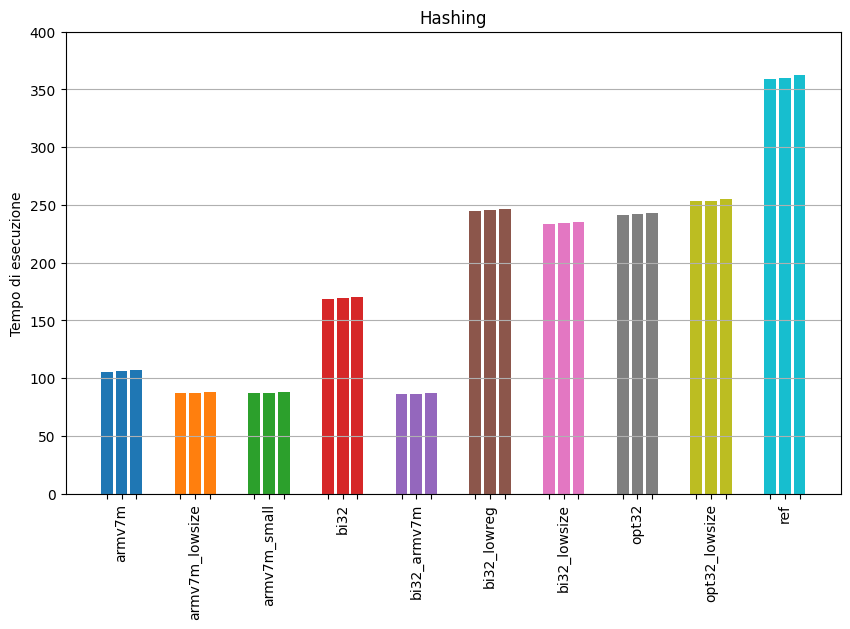

In [17]:
# Generazione hash
plotter(DATAFRAMES, "8B", IMPLEMENTATIONS, 50)

### PT 16 byte

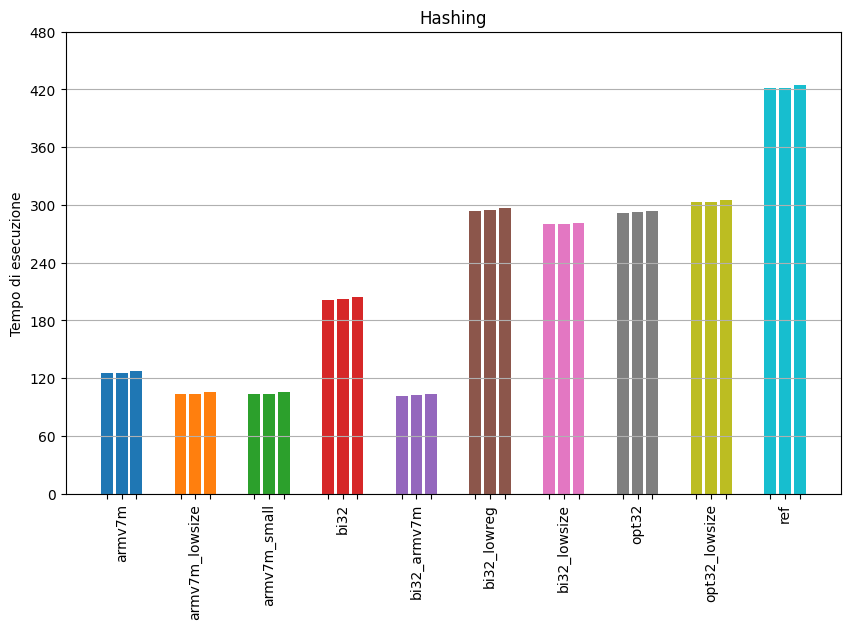

In [18]:
# Generazione hash
plotter(DATAFRAMES, "16B", IMPLEMENTATIONS, 60)

### PT 32 byte

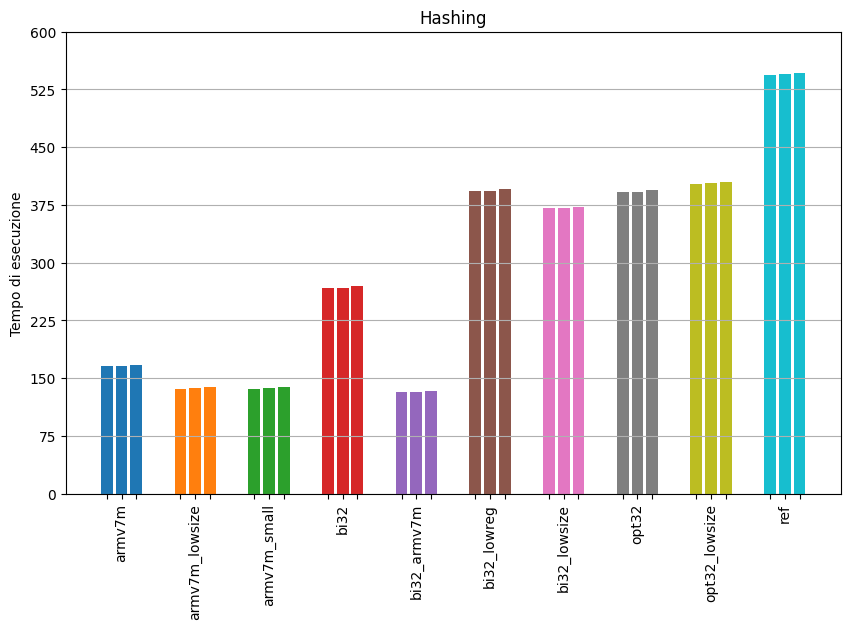

In [19]:
# Generazione hash
plotter(DATAFRAMES, "32B", IMPLEMENTATIONS, 75)

### PT 64 byte

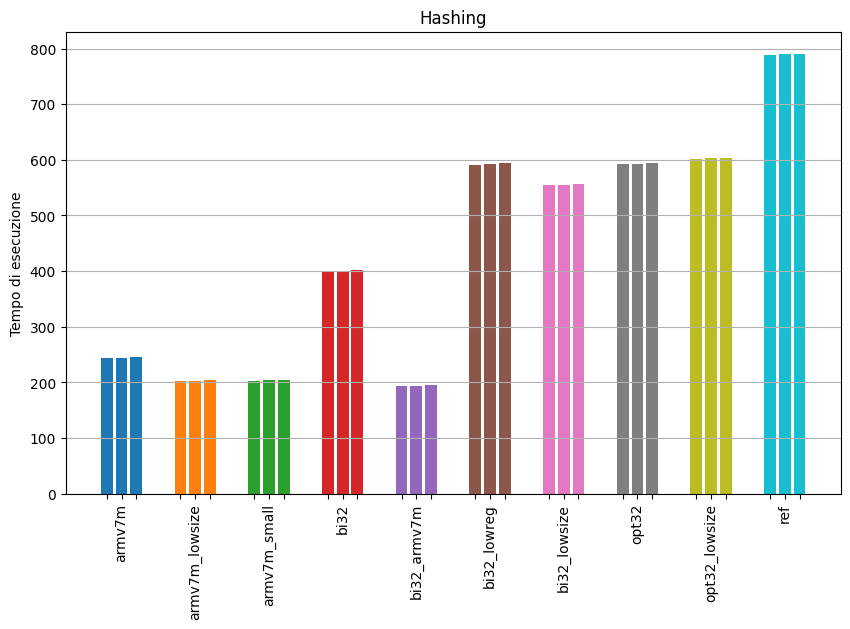

In [20]:
# Generazione hash
plotter(DATAFRAMES, "64B", IMPLEMENTATIONS, 100)

### PT 128 byte

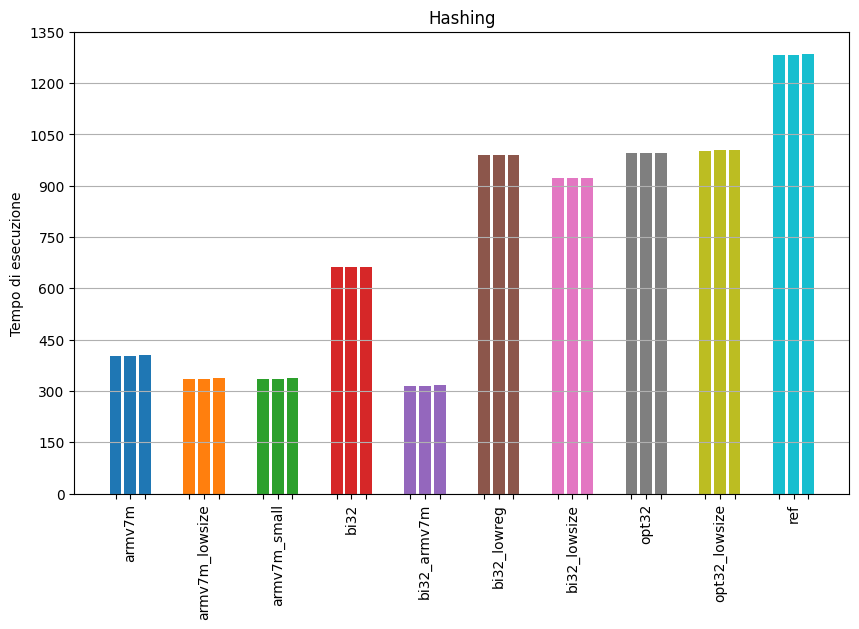

In [21]:
# Generazione hash
plotter(DATAFRAMES, "128B", IMPLEMENTATIONS, 150)

### PT 256 byte

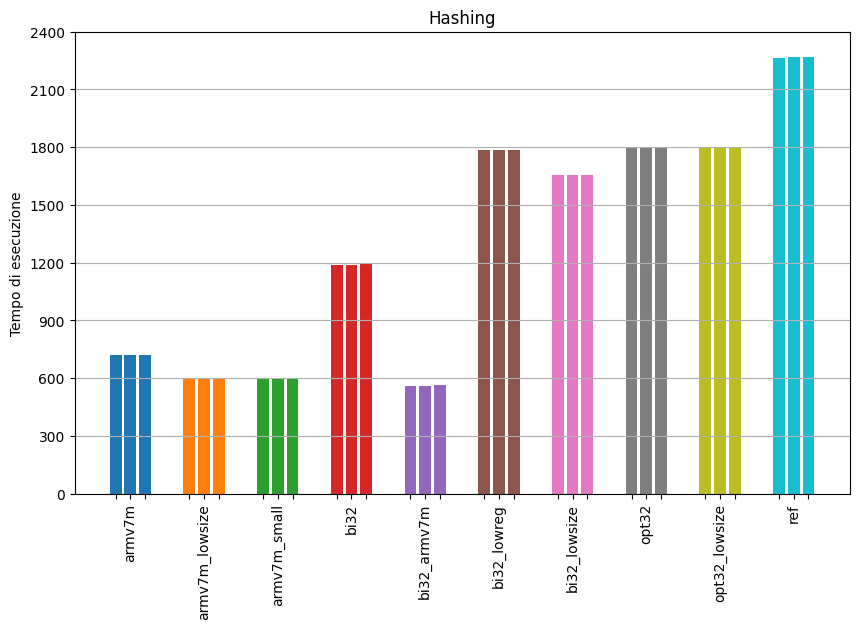

In [22]:
# Generazione hash
plotter(DATAFRAMES, "256B", IMPLEMENTATIONS, 300)

### PT 512 byte

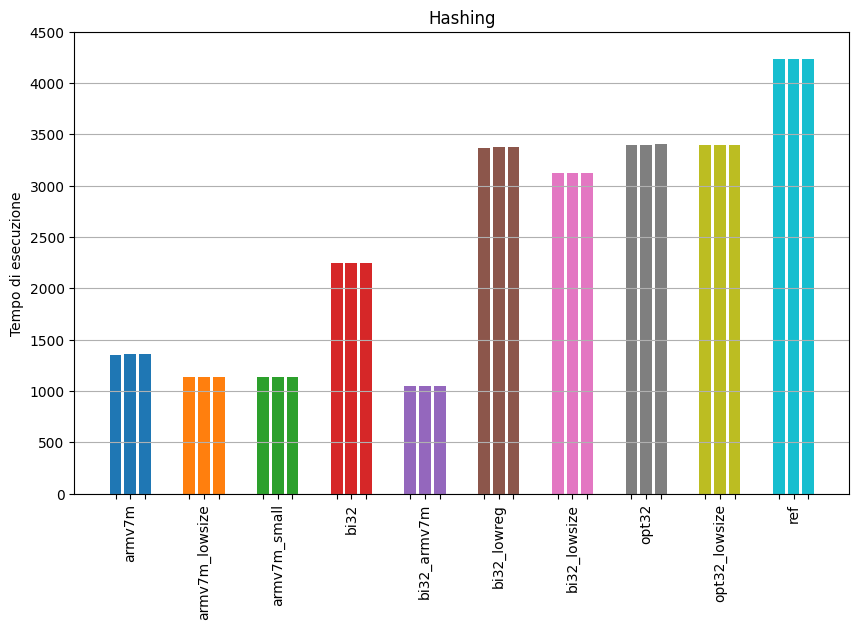

In [23]:
# Generazione hash
plotter(DATAFRAMES, "512B", IMPLEMENTATIONS, 500)

### PT 1024 byte

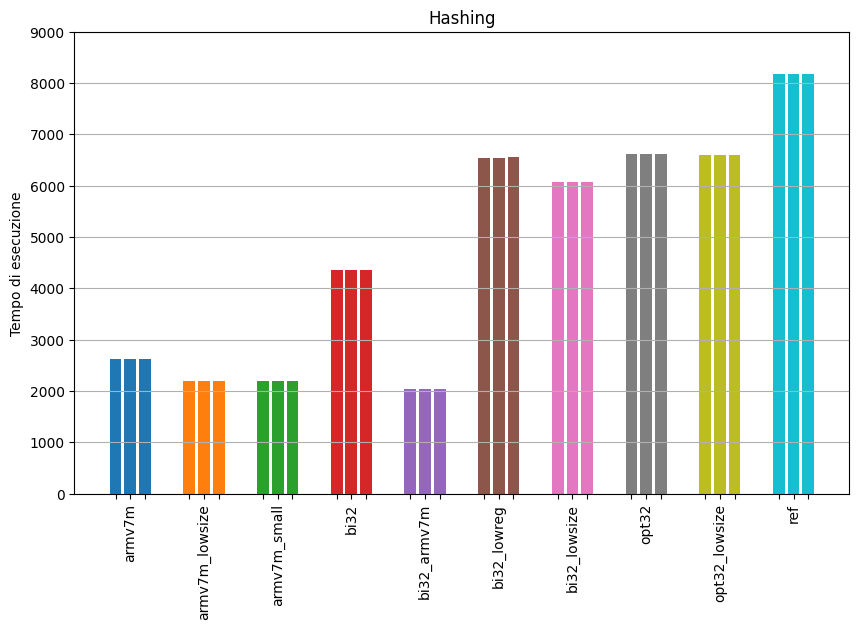

In [24]:
# Generazione hash
plotter(DATAFRAMES, "1024B", IMPLEMENTATIONS, 1000)

## Conclusioni

### Migliori implementazioni

Considerando PT di grandezza $0$, $8$, $16$ e $32$ byte, le implementazioni migliori sono `bi32_armv7m`, `armv7m_small` e `armv7m_lowsize`, con tempi di esecuzione praticamente identici

Considerando invece PT di grandezza $64$, $128$, $256$, $512$ e $1024$ byte, l'implementazione migliore è la `bi32_armv7m`

Notiamo come queste implementazioni sono tutte ottimizzate per architetture ARMv7-M

### Peggiori implementazioni

L'implementazione `ref` è quella che ha ottenuto i tempi di esecuzione peggiori in ogni possibile grandezza di PT considerata

A seguire abbiamo le implementazioni della famiglia `opt32` e della famiglia `bi32`, ma con tempi di esecuzione nettamente migliori: infatti, l'implementazione `ref` è fino al $40$\% circa più lenta rispetto alla `opt32_lowsize` e circa $3.5/4.5$ volte più lenta dell'implementazione migliore

Notiamo subito come le implementazioni peggiori sono quelle che cercano di ottimizzare architetture $32$ bit generiche oppure quella priva di ottimizzazioni

### Dimensioni eseguibile

Potevamo aspettarcelo dal nome: le implementazioni `lowsize`, `lowreg` e `small` sono quelle che hanno una dimensione dell'eseguibile molto piccola, occupando circa il $2/3$\% dello spazio disponibile, mentre l'implementazione `opt32` è quella più pesante, occupando circa il $6/7$\% dello spazio disponibile

Nonostante i pessimi tempi di esecuzione, l'implementazione `ref` fa parte delle implementazioni che hanno dimensione ridotta

Considerando l'implementazione migliore, quindi la `bi32_armv7m`, essa occupa circa il $4/5$\% dello spazio disponibile, dimostrandosi un'ottima soluzione anche per quanto riguarda lo spazio occupato